In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.5'

In [3]:
dd.apply_dark_theme() # Set the theme for the plots

In [4]:
path_to_model = os.getcwd()
print(f'Path to model: {path_to_model}')
path_to_data = os.path.dirname(path_to_model)
print(f'Path to data: {path_to_data}')

Path to model: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy
Path to data: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples


In [5]:
model = dd.Model(path_to_model)

In [6]:
model.list_morphologies()

['simple-cell', 'point', 'ball-and-stick']

In [7]:
model.load_morphology(file_name='simple-cell')

Sorted PointTree(root=Point(idx=0), num_nodes=17).
Apical dendrite is already aligned.
Extended 6 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=23).


In [8]:
model.define_domain(
    domain_name='tuft', 
    sections=model.sec_tree[4:], 
    distribute=False
)

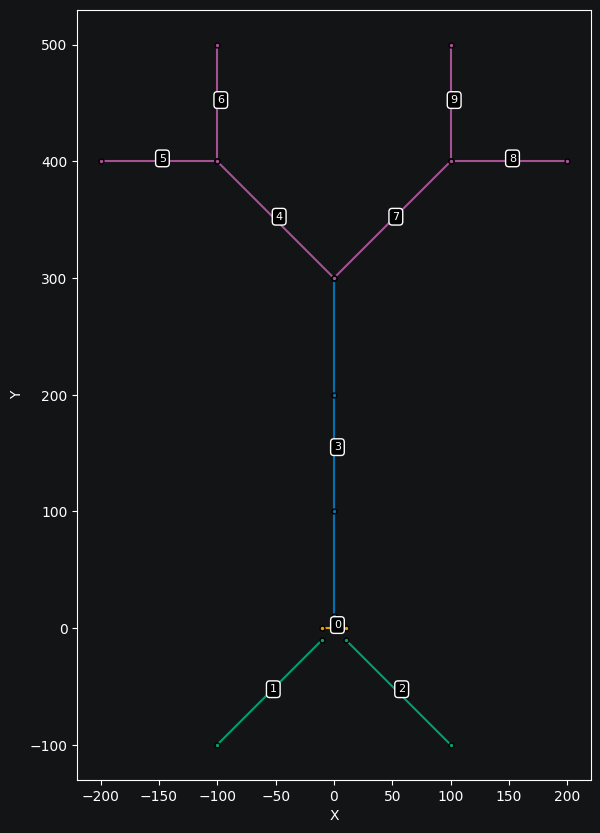

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [10]:
# model.set_param('Ra', value=100)

In [11]:
# model.set_segmentation(d_lambda=0.1)
# len(model.seg_tree)

In [12]:
model.seg_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     1 |   │ └─•2
     2 |   │   └─•3
     0 |   ├─•4
     4 |   │ └─•5
     5 |   │   └─•6
     0 |   └─•7
     7 |     └─•8
     8 |       └─•9
     9 |         └─•10
    10 |           └─•11
    11 |             ├─•12
    12 |             │ └─•13
    13 |             │   └─•14
    14 |             │     ├─•15
    15 |             │     │ └─•16
    16 |             │     │   └─•17
    14 |             │     └─•18
    18 |             │       └─•19
    19 |             │         └─•20
    11 |             └─•21
    21 |               └─•22
    22 |                 └─•23
    23 |                   ├─•24
    24 |                   │ └─•25
    25 |                   │   └─•26
    23 |                   └─•27
    27 |                     └─•28
    28 |                       └─•29


## Path lengths

Validate correctness of path length computation

In [13]:
print(f"{'Sec':^5} {'Length (μm)':^12} {'Path length (μm)':^15}")
print(f"{'-'*5} {'-'*12} {'-'*15}")
for sec in model.sec_tree:
    print(f"{sec.idx:^5} {round(sec.length, 3):<12} {sec.path_distance():<15.3f}")

 Sec  Length (μm)  Path length (μm)
----- ------------ ---------------
  0   20.0         0.000          
  1   127.279      0.000          
  2   127.279      0.000          
  3   290.0        0.000          
  4   141.421      290.000        
  5   100.0        431.421        
  6   100.0        431.421        
  7   141.421      290.000        
  8   100.0        431.421        
  9   100.0        431.421        


In [14]:
print(f"{'Sec':^5} {'Length (μm)':^12} {'Path length within domain (μm)':^30}")
print(f"{'-'*5} {'-'*12} {'-'*30}")
for sec in model.sec_tree:
    print(f"{sec.idx:^5} {round(sec.length, 3):<12} {sec.path_distance(within_domain=True):<30.3f}")

 Sec  Length (μm)  Path length within domain (μm)
----- ------------ ------------------------------
  0   20.0         0.000                         
  1   127.279      0.000                         
  2   127.279      0.000                         
  3   290.0        0.000                         
  4   141.421      0.000                         
  5   100.0        141.421                       
  6   100.0        141.421                       
  7   141.421      0.000                         
  8   100.0        141.421                       
  9   100.0        141.421                       


In [15]:
print(f"{'Sec':^5} {'x position':^10} {'Path length (μm)':^18}")
print(f"{'-'*5} {'-'*10} {'-'*18}")
for seg in model.seg_tree:
    print(f"{seg._section.idx:^5} {round(seg.x, 3):<10} {seg.path_distance():<18.3f}")

 Sec  x position  Path length (μm) 
----- ---------- ------------------
  0   0.5        0.000             
  1   0.167      21.213            
  1   0.5        63.640            
  1   0.833      106.066           
  2   0.167      21.213            
  2   0.5        63.640            
  2   0.833      106.066           
  3   0.1        29.000            
  3   0.3        87.000            
  3   0.5        145.000           
  3   0.7        203.000           
  3   0.9        261.000           
  4   0.167      313.570           
  4   0.5        360.711           
  4   0.833      407.851           
  5   0.167      448.088           
  5   0.5        481.421           
  5   0.833      514.755           
  6   0.167      448.088           
  6   0.5        481.421           
  6   0.833      514.755           
  7   0.167      313.570           
  7   0.5        360.711           
  7   0.833      407.851           
  8   0.167      448.088           
  8   0.5        481.421    

In [16]:
print(model.sec_tree[3].domain)

model.sec_tree[3].seg_centers

apic


[29.0, 87.0, 145.0, 203.0, 261.0]

# Mechanisms

In [17]:
model.add_default_mechanisms()

In [18]:
model.list_mechanisms()

['KCa',
 'stdKv',
 'stdNa',
 'Ka',
 'NaKinetic',
 'Km',
 'Na',
 'CaLVA',
 'CaHVA',
 'Kv']

In [19]:
for mech in ['NaKinetic', 'Kv']:
    model.add_mechanism(mech)

(model_io.py, line 235)


Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Toy/biophys/python/Kv.py


In [20]:
model.mechanisms

{'Leak': <Mechanism(Leak)>,
 'CaDyn': <Mechanism(CaDyn)>,
 'NaKinetic': <Mechanism(NaKinetic)>,
 'Kv': <Mechanism(Kv)>}

In [21]:
for domain_name in model.domains:
    for mech_name in model.mechanisms:
        if mech_name == 'CaDyn':
            continue
        model.insert_mechanism(mech_name, domain_name, distribute=False)

In [22]:
model.set_param('gbar_Leak', value=0.0004)

# Na
model.set_param('gbar_NaKinetic', value=0.015)

# # Kv
model.set_param('gbar_Kv', value=0.05)

# Simulation

In [23]:
soma = model.sec_tree[0]
model.remove_all_stimuli()
model.remove_all_recordings()

model.add_recording(soma, loc=0.5)
model.add_iclamp(soma, loc=0.5, amp=0.1, delay=50, dur=900)

Recording added to sec NeuronSection(idx=0) at loc 0.5.
IClamp added to sec NeuronSection(idx=0) at loc 0.5.


In [24]:
model.simulator.run(1000); #ms

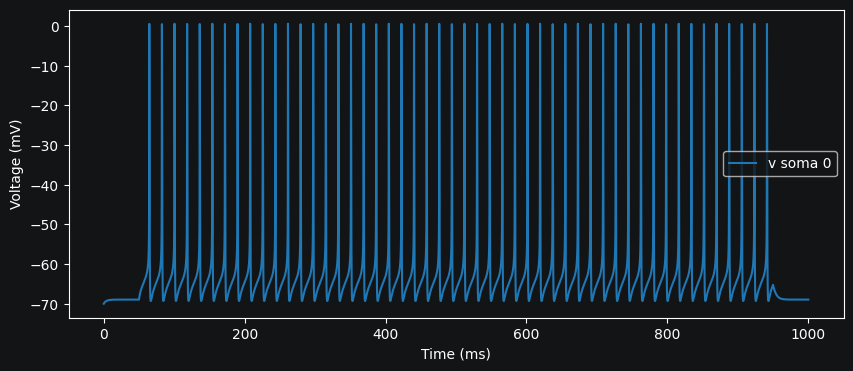

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)